# **Impr. Employee Ret. by Predicting Emp. Attrition Using ML**
----------

# **Introduction**

## **Problem Statement**
Sumber daya manusia (SDM) adalah aset utama yang perlu dikelola dengan baik oleh perusahaan agar tujuan bisnis dapat tercapai dengan efektif dan efisien. Pada kesempatan kali ini, kita akan menghadapi sebuah permasalahan tentang sumber daya manusia yang ada di perusahaan. Fokus kita adalah untuk mengetahui bagaimana cara menjaga karyawan agar tetap bertahan di perusahaan yang ada saat ini yang dapat mengakibatkan bengkaknya biaya untuk rekrutmen karyawan serta pelatihan untuk mereka yang baru masuk. Dengan mengetahui faktor utama yang menyebabkan karyawan tidak merasa, perusahaan dapat segera menanggulanginya dengan membuat program-program yang relevan dengan permasalahan karyawan.

## **Objective**

## **Data Overview**

# **Data Preprocessing**

## **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import math

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## **Load Data**

In [2]:
df = pd.read_csv('hr_data.csv')
df.sample(5)

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
189,grudgingMeerkat3,106008,Belum_menikah,Wanita,Outsource,Software Engineer (Back End),Freshgraduate_program,Bagus,Jakarta Timur,CareerBuilder,3,4.0,0.0,0.0,4.0,+6285714869xxx,grudgingMeerkat3383@proton.com,Sarjana,1,NaN,NaN,1986-04-17,2011-01-10,2017-02-03,-
183,aboardUnicorn8,106687,Belum_menikah,Pria,FullTime,Software Engineer (Back End),Mid_level,Bagus,Jakarta Timur,Indeed,3,3.0,0.0,0.0,6.0,+6281943118xxx,aboardUnicorn8967@outlook.com,Magister,1,NaN,masih_bekerja,1968-01-15,2006-01-09,2020-01-04,-
250,jubilantTeal7,106547,Lainnya,Pria,FullTime,DevOps Engineer,Freshgraduate_program,Bagus,Jakarta Barat,Employee_Referral,3,3.0,7.0,0.0,16.0,+6287898271xxx,jubilantTeal7049@hotmail.com,Magister,1,NaN,NaN,1970-02-08,2015-01-05,2020-1-14,-
270,truthfulHawk9,106029,Menikah,Wanita,FullTime,Software Engineer (Back End),Senior_level,Biasa,Jakarta Selatan,Indeed,4,3.0,0.0,0.0,10.0,+6285919278xxx,truthfulHawk9561@yahoo.com,Sarjana,1,NaN,NaN,1954-09-21,2012-07-02,2020-1-17,-
116,zestyTermite5,105558,Menikah,Wanita,FullTime,Software Engineer (Front End),Senior_level,Bagus,Jakarta Timur,Indeed,4,5.0,0.0,0.0,6.0,+6283215136xxx,zestyTermite5310@yahoo.com,Magister,1,NaN,masih_bekerja,1977-03-31,2015-01-05,2020-2-14,-


## **General Info**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

In [4]:
lst_itm = []
for col in df.columns:
    dtypes       = df[col].dtype
    n_null       = df[col].isnull().sum()
    percent_null = round(100*df[col].isnull().sum()/len(df[col]),2)
    n_unique     = df[col].nunique()
    unique       = df[col].unique()[:5]
    lst_itm.append([col,dtypes, n_null,percent_null,n_unique,unique] )
df_desc = pd.DataFrame(data=lst_itm, columns=['Feature', 'dtypes', 'n_null', 'percent_null', 'n_unique', 'unique'])
df_desc.style.background_gradient(cmap='Greens')

,Feature,dtypes,n_null,percent_null,n_unique,unique
0,Username,object,0,0.000000,285,['spiritedPorpoise3' 'jealousGelding2' 'pluckyMuesli3' 'stressedTruffle1' 'shyTermite7']
1,EnterpriseID,int64,0,0.000000,287,[111065 106080 106452 106325 111171]
2,StatusPernikahan,object,0,0.000000,5,['Belum_menikah' 'Menikah' 'Bercerai' 'Lainnya' '-']
3,JenisKelamin,object,0,0.000000,2,['Pria' 'Wanita']
4,StatusKepegawaian,object,0,0.000000,3,['Outsource' 'FullTime' 'Internship']
5,Pekerjaan,object,0,0.000000,14,['Software Engineer (Back End)' 'Data Analyst' 'Software Engineer (Front End)' 'Product Manager' 'Software Engineer (Android)']
6,JenjangKarir,object,0,0.000000,3,['Freshgraduate_program' 'Senior_level' 'Mid_level']
7,PerformancePegawai,object,0,0.000000,5,['Sangat_bagus' 'Sangat_kurang' 'Bagus' 'Biasa' 'Kurang']
8,AsalDaerah,object,0,0.000000,5,['Jakarta Timur' 'Jakarta Utara' 'Jakarta Pusat' 'Jakarta Selatan' 'Jakarta Barat']
9,HiringPlatform,object,0,0.000000,9,['Employee_Referral' 'Website' 'Indeed' 'LinkedIn' 'CareerBuilder']


## **Drop Unnecessary Features**

dihapus karena tidak memberikan Fitur dengan nilai yang unik untuk setiap data point (baris) umumnya tidak memberikan informasi yang berguna untuk membangun model machine learning atau melakukan analisis statistik.
dan untuk nilai yang hanya 1 value, idak ada variasi atau perubahan dalam nilai, sehingga tidak memberikan informasi yang berguna untuk membedakan satu data point dengan data point lainnya.

Username, NomorHP, Email, dan EnterpriseID di drop karena nilainya unik semua dan kolom PernahBekerja juga di drop karena hanya menampilkan value yes dan 1 yang artinya sama, maka akan di drop di tahap selanjutnya

In [ ]:
df = df.drop(columns=['Username', 'EnterpriseID', 'NomorHP', 'Email', 'PernahBekerja'])

## **Descriptive Analysis**

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SkorSurveyEngagement,287.0,3.101045,0.836388,1.0,3.0,3.0,4.0,5.0
SkorKepuasanPegawai,282.0,3.904255,0.913355,1.0,3.0,4.0,5.0,5.0
JumlahKeikutsertaanProjek,284.0,1.179577,2.294441,0.0,0.0,0.0,0.0,8.0
JumlahKeterlambatanSebulanTerakhir,286.0,0.412587,1.275016,0.0,0.0,0.0,0.0,6.0
JumlahKetidakhadiran,281.0,10.448399,6.902252,1.0,5.0,10.0,15.0,55.0
IkutProgramLOP,29.0,0.517241,0.508548,0.0,0.0,1.0,1.0,1.0


In [7]:
df.describe(include=['object']).T

,count,unique,top,freq
StatusPernikahan,287,5,Belum_menikah,132
JenisKelamin,287,2,Wanita,167
StatusKepegawaian,287,3,FullTime,217
Pekerjaan,287,14,Software Engineer (Back End),109
JenjangKarir,287,3,Freshgraduate_program,169
PerformancePegawai,287,5,Biasa,85
AsalDaerah,287,5,Jakarta Pusat,72
HiringPlatform,287,9,Indeed,85
TingkatPendidikan,287,3,Sarjana,176
PernahBekerja,287,2,1,286


## **Check Duplicated Data**

In [8]:
print("Jumlah baris duplikat:", df.duplicated().sum())

Jumlah baris duplikat: 0


## **Check Missing Values**

In [9]:
# check for empty elements
print('Missing values status:', df.isnull().values.sum())

count_nv = pd.DataFrame(df.isnull().sum(), columns=['Total Null Values']).reset_index()
count_nv['Percentage'] = (count_nv['Total Null Values']/df.shape[0])*100
count_nv[count_nv['Percentage'] > 0].sort_values(by='Percentage', ascending=False).style.background_gradient(cmap='Greens')

Missing values status: 339


,index,Total Null Values,Percentage
15,IkutProgramLOP,258,89.895470
16,AlasanResign,66,22.996516
12,JumlahKetidakhadiran,6,2.090592
9,SkorKepuasanPegawai,5,1.742160
10,JumlahKeikutsertaanProjek,3,1.045296
11,JumlahKeterlambatanSebulanTerakhir,1,0.348432


1. No duplicated data.
2. Columns that have missing values:
    - 258 -> IkutProgramLOP
    - 66 -> AlasanResign
    - 6 -> JumlahKetidakhadiran
    - 5 -> SkorKepuasanPegawai
    - 3 -> JumlahKeikutsertaanProjek
    - 1 -> JumlahKeterlambatanSebulanTerakhir

## **Check the outliers**

In [10]:
# Pilih kolom dengan tipe data numerik saja
col_numeric = [
            'SkorSurveyEngagement',
            'SkorKepuasanPegawai',
            'JumlahKeikutsertaanProjek',
            'JumlahKeterlambatanSebulanTerakhir',
            'JumlahKetidakhadiran',
            'IkutProgramLOP'
            ]
# Definisikan warna yang digunakan
color = ['#ff6d00', '#9d4edd', '#ff9e00', '#9d4edd', '#ff9e00', '#9d4edd']

for i in range(len(col_numeric)):
    # Create the horizontal box plot
    fig = px.box(
        df[col_numeric[i]],
        orientation = 'h',
        width=700,
        height=300,
        color_discrete_sequence  = [color[i]]
    )

    # Update layout and display the plot
    fig.update_layout(
        title = f'Box Plot <b>{col_numeric[i]}</b>',
        yaxis = dict(
            title    = None,
            showgrid = False,
        ),
        xaxis = dict(
            title    = 'Total',
            showgrid = False,
        )
    )

    fig.show()

## **Correlation**

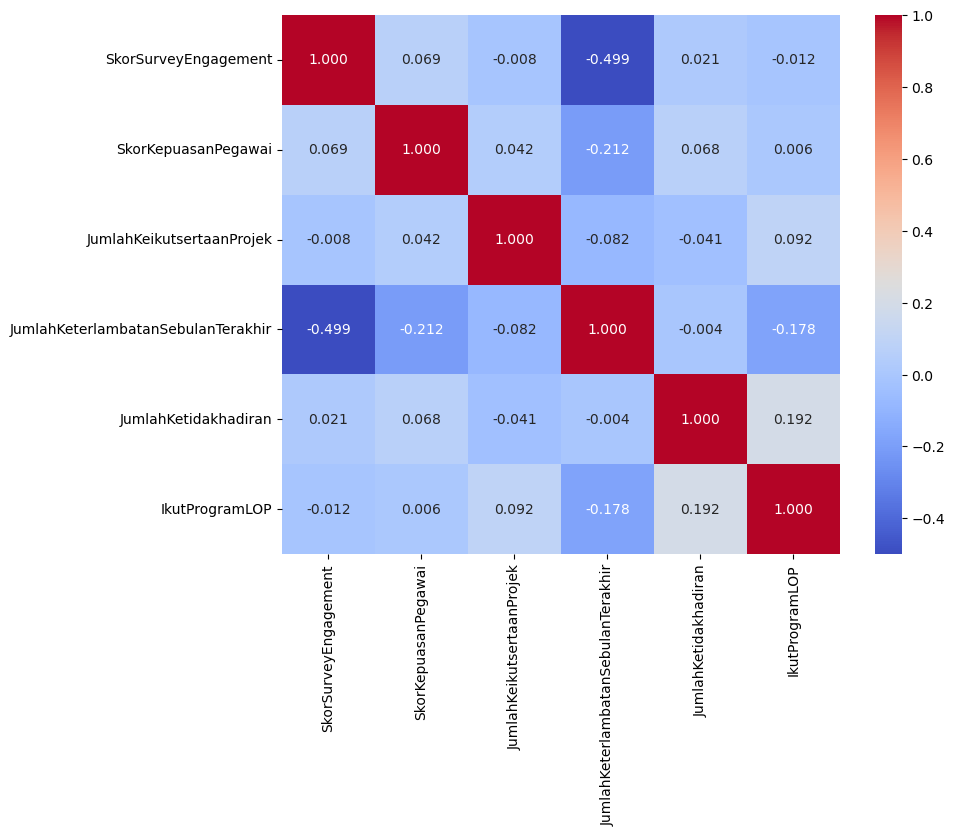

In [11]:
plt.figure(figsize=(9, 7))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=True, fmt='.3f')
plt.show()

In [12]:
cats = df.select_dtypes(include=['object']).columns.tolist()

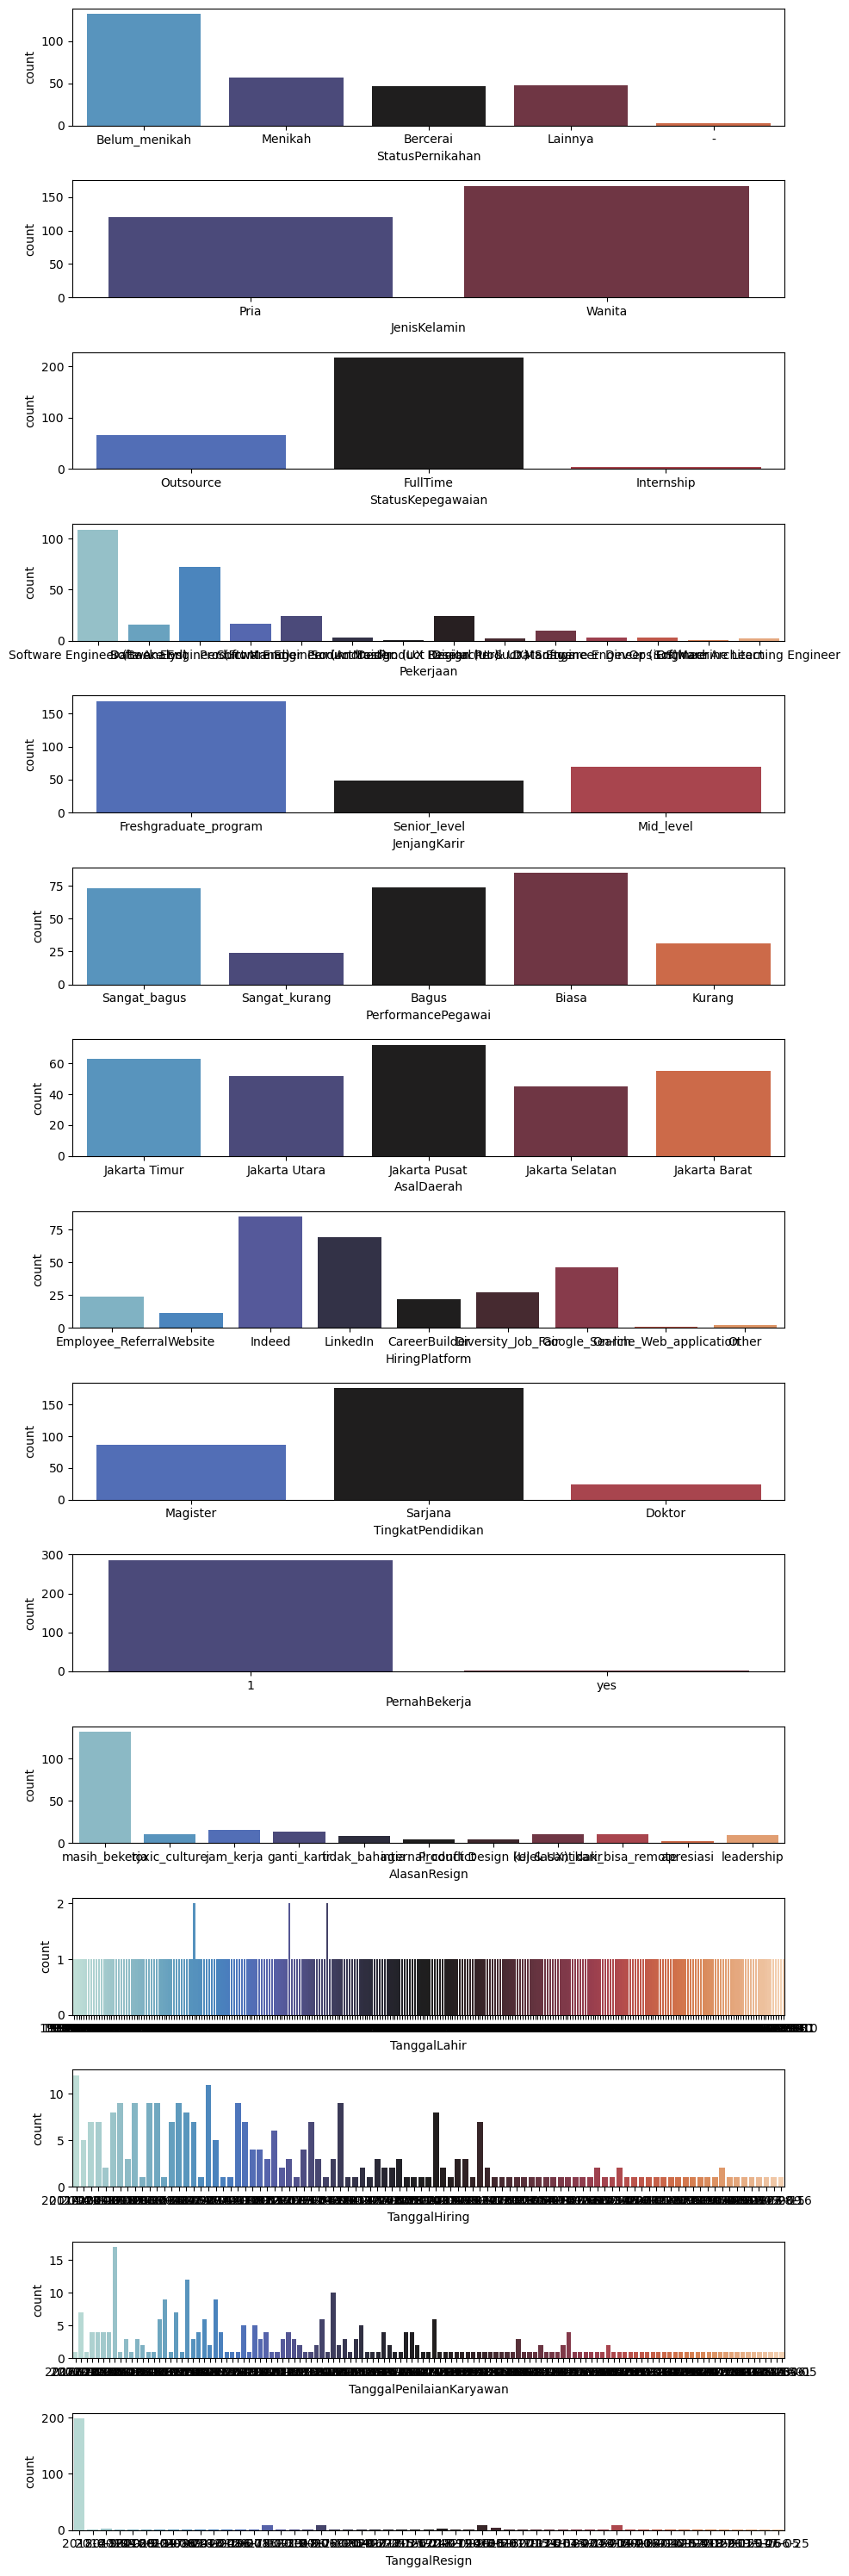

In [13]:
plt.figure(figsize=(10, 30))
num_plots = len(cats)
num_cols = 1
num_rows = math.ceil(num_plots / num_cols)

for i in range(num_plots):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.countplot(x=df[cats[i]], palette = 'icefire')
    
plt.tight_layout()
plt.show()

# Ubah data type tanggal dari object ke datetime

In [14]:
df_nan_alasan = df.copy()

# ubah value '-' menjadi nan supaya bisa diubah type datanya
df_nan_alasan = df_nan_alasan.replace('-',np.nan)

df_nan_alasan['TanggalResign'] = pd.to_datetime(df_nan_alasan['TanggalResign'])
df_nan_alasan['TanggalHiring'] = pd.to_datetime(df_nan_alasan['TanggalHiring'])
df_nan_alasan['TanggalPenilaianKaryawan'] = pd.to_datetime(df_nan_alasan['TanggalPenilaianKaryawan'])
df_nan_alasan['TanggalLahir'] = pd.to_datetime(df_nan_alasan['TanggalLahir'])

df_nan_alasan['TahunResign'] = df_nan_alasan['TanggalResign'].dt.year
df_nan_alasan['TahunHiring'] = df_nan_alasan['TanggalHiring'].dt.year
df_nan_alasan['TahunPenilaianKaryawan'] = df_nan_alasan['TanggalPenilaianKaryawan'].dt.year
df_nan_alasan['TahunLahir'] = df_nan_alasan['TanggalLahir'].dt.year

df_nan_alasan['Umur'] = 2021 - df_nan_alasan['TahunLahir']

# Tambah fitur baru dari tanggal resign dikurang dengan tanggal masuk pada tahap selanjutnya

In [15]:
df_hiring = df_nan_alasan.groupby(['TahunHiring'])['TanggalLahir'].count().reset_index()
df_hiring.columns = (['Tahun','Hiring'])
df_hiring.style.background_gradient(cmap='Greens')

,Tahun,Hiring
0,2006,1
1,2007,2
2,2008,2
3,2009,7
4,2010,8
5,2011,76
6,2012,41
7,2013,43
8,2014,56
9,2015,31


# **Exploratory Data Analysis (EDA)**

# ** Perusahaan banyak menghire pegawai di tahun 2011 sebanyak 76 pegawai, diikuti di tahun 2014 sebanyak 56 pegawai

In [16]:
df_penilaian = df_nan_alasan.groupby(['TahunPenilaianKaryawan'])['TanggalLahir'].count().reset_index()
df_penilaian.columns = (['Tahun','Penilaian'])
df_penilaian.style.background_gradient(cmap='Greens')

,Tahun,Penilaian
0,2011,1
1,2012,3
2,2013,10
3,2014,17
4,2015,7
5,2016,20
6,2017,16
7,2018,9
8,2019,9
9,2020,195


In [17]:
df_umur = df_nan_alasan.groupby(['Umur'])['TanggalLahir'].count().reset_index()
df_umur.columns = (['Umur','Jumlah'])
df_umur.style.background_gradient(cmap='Greens')

,Umur,Jumlah
0,29,3
1,30,2
2,31,5
3,32,13
4,33,18
5,34,17
6,35,19
7,36,10
8,37,16
9,38,20


berartti data terakhir kita ambil di 2020 digunakan untuk menentukan umur 

In [18]:
df_lahir = df_nan_alasan.groupby(['TahunLahir'])['TanggalLahir'].count().reset_index()
df_lahir.columns = (['Tahun','Jumlah'])
df_lahir.style.background_gradient(cmap='Greens')

,Tahun,Jumlah
0,1951,2
1,1952,3
2,1953,1
3,1954,2
4,1955,1
5,1958,1
6,1959,1
7,1961,1
8,1963,3
9,1964,5


In [19]:
df_resign = df_nan_alasan.groupby(['TahunResign'])['TanggalLahir'].count().reset_index()
df_resign.columns = (['Tahun','Resign'])
df_resign.style.background_gradient(cmap='Greens')

,Tahun,Resign
0,2013.000000,5
1,2014.000000,12
2,2015.000000,8
3,2016.000000,8
4,2017.000000,19
5,2018.000000,26
6,2019.000000,5
7,2020.000000,6


In [20]:
df_ar = df.loc[:, ['AlasanResign', 'TanggalResign']]
df_ar = df_ar.loc[df_ar.AlasanResign.isna(), :]
df_ar.describe()

,AlasanResign,TanggalResign
count,0,66
unique,0,1
top,NaN,-
freq,NaN,66


- There are 66 '-' values in `TanggalResign` and it's the same amount of missing value in `AlasanResign`
- Hence, it's safe to say that all NaN can be replaced by "masih_bekerja" since the user has no resignation date

In [21]:
df_alasan = df_nan_alasan.groupby(['AlasanResign', 'TahunResign'])['TanggalLahir'].count().reset_index()
df_alasan.sort_values(by='TahunResign').style.background_gradient(cmap='Greens')

,AlasanResign,TahunResign,TanggalLahir
5,ganti_karir,2013.000000,2
24,leadership,2013.000000,3
38,toxic_culture,2014.000000,2
6,ganti_karir,2014.000000,1
32,tidak_bisa_remote,2014.000000,1
28,tidak_bahagia,2014.000000,1
25,leadership,2014.000000,1
20,kejelasan_karir,2014.000000,2
15,jam_kerja,2014.000000,4
39,toxic_culture,2015.000000,1


## **Bivariate Analysis**

In [22]:
jumlah_pegawai_per_alasan = df_nan_alasan.groupby(['AlasanResign', 'TahunResign'])['TanggalLahir'].count().reset_index()

jumlah_pegawai_per_alasan.sort_values(by=["TanggalLahir"],ascending=False).style.background_gradient(cmap='Greens')

,AlasanResign,TahunResign,TanggalLahir
18,jam_kerja,2018.000000,6
23,kejelasan_karir,2018.000000,5
15,jam_kerja,2014.000000,4
30,tidak_bahagia,2018.000000,4
8,ganti_karir,2016.000000,3
17,jam_kerja,2017.000000,3
24,leadership,2013.000000,3
26,leadership,2017.000000,3
22,kejelasan_karir,2017.000000,3
37,tidak_bisa_remote,2020.000000,3


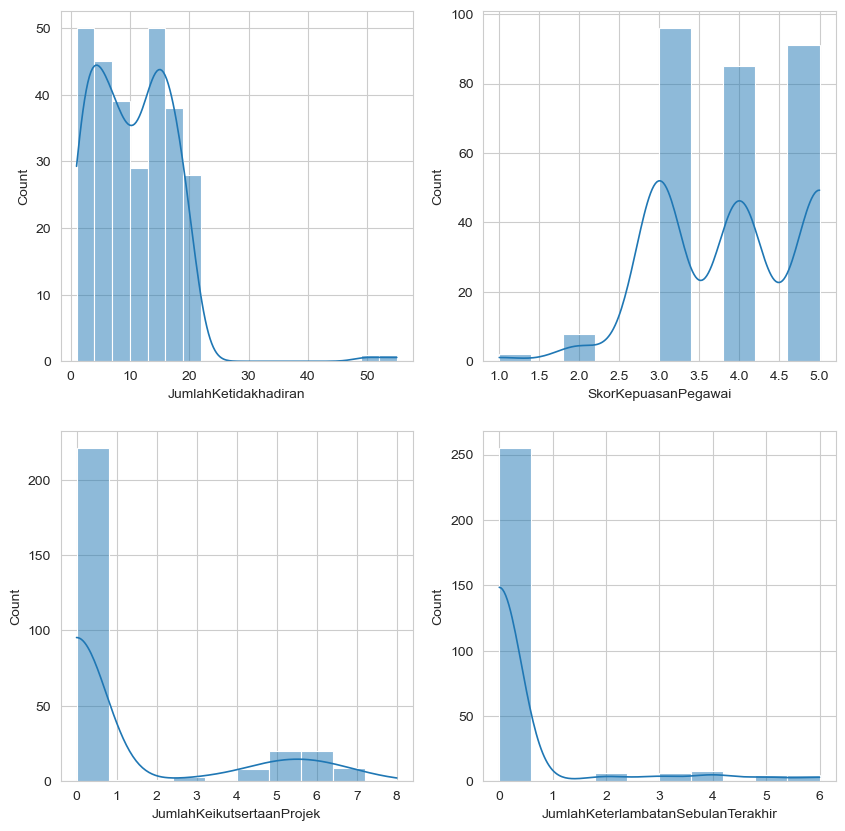

In [23]:
# distribution of numerical features that have missing values part 1
sns.set_style('whitegrid')
fig, ax = plt.subplots(2,2, figsize=(10,10))
sns.set_context('paper', font_scale=1)

sns.histplot(df['JumlahKetidakhadiran'], ax=ax[0][0], kde=True)
sns.histplot(df['SkorKepuasanPegawai'], ax=ax[0][1], kde=True)
sns.histplot(df['JumlahKeikutsertaanProjek'], ax=ax[1][0], kde=True)
sns.histplot(df['JumlahKeterlambatanSebulanTerakhir'], ax=ax[1][1], kde=True)
plt.show()

one-hot encoding

label encoding

## **Change Data Type**

# **Mengubah data tipe tanggal dari object ke datetime merupakan langkah penting dalam preprocessing data pada proyek pembuatan model di Jupyter Notebook (IPython Notebook). Proses ini umumnya termasuk dalam tahap pembersihan dan persiapan data (data cleaning and preparation).

In [24]:
df = df.replace('-',np.nan)

In [25]:
# # Change Data Type --> int64
# kolom_int = ['SkorKepuasanPegawai', 'JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran', 'IkutProgramLOP']
# df[kolom_int] = df[kolom_int].astype('int64')

In [26]:
# Change Data Type --> int64
kolom_tanggal = ['TanggalLahir', 'TanggalHiring', 'TanggalPenilaianKaryawan', 'TanggalResign']
df[kolom_tanggal] = df[kolom_tanggal].apply(pd.to_datetime)

In [27]:
df.dtypes

StatusPernikahan                              object
JenisKelamin                                  object
StatusKepegawaian                             object
Pekerjaan                                     object
JenjangKarir                                  object
PerformancePegawai                            object
AsalDaerah                                    object
HiringPlatform                                object
SkorSurveyEngagement                           int64
SkorKepuasanPegawai                          float64
JumlahKeikutsertaanProjek                    float64
JumlahKeterlambatanSebulanTerakhir           float64
JumlahKetidakhadiran                         float64
TingkatPendidikan                             object
PernahBekerja                                 object
IkutProgramLOP                               float64
AlasanResign                                  object
TanggalLahir                          datetime64[ns]
TanggalHiring                         datetime

## **Feature**

In [28]:
df['TahunHiring'] = df['TanggalHiring'].dt.year
df['TahunPenilaianKaryawan'] = df['TanggalPenilaianKaryawan'].dt.year
df['TahunLahir'] = df['TanggalLahir'].dt.year
df['TahunResign'] = df['TanggalResign'].dt.year
df['Umur'] = 2020 - df['TahunLahir']

## **Handling Missing Value**

In [ ]:
df['IkutProgramLOP'].fillna(0.0, inplace=True)

df['AlasanResign'].fillna(df['AlasanResign'].mode()[0], inplace=True)

## **Feature Selection**

## **Data Splitting**

# **Modeling**

# Import Data: Membaca data dari file (misalnya CSV, Excel) ke dalam DataFrame Pandas.
Eksplorasi Data: Memahami struktur data, tipe data setiap kolom, dan mencari adanya missing values atau anomali.
Pembersihan Data: Mengatasi masalah seperti missing values, outliers, dan data yang tidak konsisten.
Transformasi Data:
Mengubah Tipe Data: Mengubah tipe data kolom tanggal dari object menjadi datetime.
Encoding: Mengubah data kategorikal menjadi bentuk numerik jika diperlukan.
Scaling: Menskalakan data numerik jika diperlukan.
Feature Engineering: Membuat fitur-fitur baru yang relevan dengan masalah yang ingin dipecahkan.
Pembagian Data: Membagi data menjadi data latih dan data uji.
Pemilihan Model: Memilih algoritma machine learning yang sesuai dengan masalah.
Pelatihan Model: Melatih model dengan menggunakan data latih.
Evaluasi Model: Mengevaluasi kinerja model dengan menggunakan data uji.
Deployment: Menerapkan model ke dalam aplikasi atau sistem yang sebenarnya.